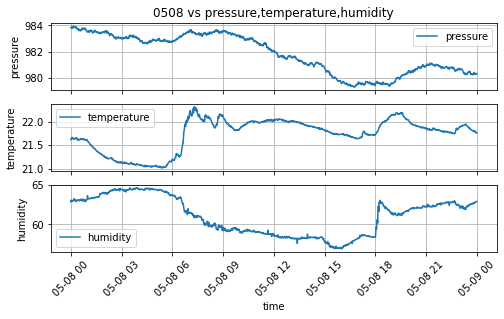

In [5]:
import PySimpleGUI as sg
import pandas as pd
import matplotlib.pyplot as plt
import ntpath
import os
import subprocess
import dataframe_image as dfi
# User Function
import gui_operation

# Get csv data from GUI
file_path, Open_GUI, Open_DIR = gui_operation.read_csv_file()

#保存先のディレクトリ作成
os.makedirs('log', exist_ok=True)

if file_path != "NULL": # run only selecting csv file,

    # Variable setting 
    file_name = ntpath.basename(file_path)
    axis_name = ['pressure','temperature','humidity']
    axis_len = len(axis_name) # axis_name couont.
    graff_title = (file_name[4:8] + ' vs pressure,temperature,humidity')
    graff_fig_save_file = ('./log/' + file_name[4:8] +'_img.png')
    table_fig_save_file = ('./log/' + file_name[4:8] +'_dataframe.png')

    #絶対ディレクトリでファイル指定する。
    df = pd.read_csv(file_path)

    #group化し、describeの取得。
    grouped = df.groupby('date')

    for i in range (axis_len):
        df_sescribe = grouped.describe()[axis_name[i]]
        df_sescribe.insert(0, 'item',axis_name[i])
    
        if  i == 0 :
            df_append = df_sescribe
        else:
            df_append = df_append.append(df_sescribe, ignore_index=True)

    df_append.to_csv( "./log/" + file_name[4:8] + "_output_pd.csv", encoding="shift_jis")
    dfi.export(df_append, table_fig_save_file)

    # フォルダを開く    
    if Open_DIR:
        cwd = os.getcwd() #現在のディレクトリ情報を取得
        subprocess.Popen(["explorer",  cwd + "\log" ], shell=True) #file open

    # pandas のdate time編集
    df['daytime'] = pd.to_datetime( file_name[0:4] + '/' + df['date'] + ' ' + df['time'])

    # set up figure size
    fig = plt.figure(figsize=(8,6))

    # X軸の値取得 - 共通部分
    x1 = pd.to_datetime(df['daytime'])

    for i in range (axis_len):
        ax = fig.add_subplot(3,1,i+1)
    
        if   i == 0 :                         # 最初
            ax.set_title(graff_title)      # グラフ タイトル
        
        if i == (axis_len - 1):
            ax.set_xlabel("time")              # x 軸 ラベル         
        else:
            ax.axes.xaxis.set_ticklabels([])   #ラベル/テキストを非表示にする
    
        y1 =pd.Series(df[axis_name[i]],    dtype='float')
        ax.plot(x1, y1)                          # 値のplot

        ax.set_ylabel(axis_name[i])             # y 軸 ラベル
        ax.grid(True)                          # grid 表示 ON
        ax.legend([axis_name[i]])              # 凡例 を 表示

    plt.xticks(rotation=45)                    # 軸のローテーション
    plt.rcParams['figure.subplot.bottom'] = 0.35 #下端の調整

    plt.show()

    #画像の保存
    fig.savefig(graff_fig_save_file)
    
    if Open_GUI:
        sg.theme('SystemDefault')
        layout = [
          [sg.Image(graff_fig_save_file),sg.Image(table_fig_save_file)]
        ]
        window = sg.Window('画像', layout=layout)
        # イベントループ
        while True:
            event, values = window.read()
            if event == sg.WIN_CLOSED:
                break
        window.close()


In [2]:
import PySimpleGUI as sg

def read_csv_file():
        
    # GUI color select
    sg.change_look_and_feel('Light Blue 2')

    layout = [[sg.Text('Data'),
               sg.InputText(' file path',key='-file-'),
               sg.FilesBrowse('Read file', target='-file-', file_types=(('csv file', '.csv'),))],
              [sg.Checkbox('GUI',default=False, key='-GUI-'),sg.Checkbox('Open dir',default=False, key='-DIR-')],
              [sg.Submit(), sg.Cancel()]
    ]
  
    # Make a window
    window = sg.Window('Charting', layout)#window title

    # Event operation
    while True:
        event, values = window.read() # Event read 
        if event in 'Submit': 
            Get_file = values['-file-'] # Get file path
            if  Get_file == ' file path':
                Get_file = 'NULL'
            break
        else:
            Get_file = 'NULL' # Get file path
            break
    window.close()
    Check_GUI = values['-GUI-']
    Check_DIR = values['-DIR-']
    print(Check_GUI)
    print(Check_DIR)

    return Get_file,Check_GUI,Check_DIR

file_path, Open_GUI, Open_DIR = read_csv_file()

print(file_path)
print(Check_GUI)
print(Check_DIR)


TypeError: 'in <string>' requires string as left operand, not NoneType